In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
#1. Load Data _ the train.csv first
df = pd.read_csv('train.csv')

In [43]:
#2. View the first few rows
print("--- First 5 Rows ---")
display(df.head())

--- First 5 Rows ---


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
#3. Get summary statistics for numerical columns (Mean, Std, Min, Max)
print("\n--- Summary Statistics ---")
display(df.describe())


--- Summary Statistics ---


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [45]:
# Check for missing values (This informs our cleaning step later)
print("\n--- Missing Values Count ---")
print(df.isnull().sum())


--- Missing Values Count ---
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [46]:
# You will need to create a correlation matrix

# Map the targets to Numbers to see correlation
df['Loan_Status_NUM'] = df['Loan_Status'].map({'Y' : 1, 'N' : 0})

# Create the correlation Matrix
corr_matrix = df.select_dtypes(include=['number']).corr()



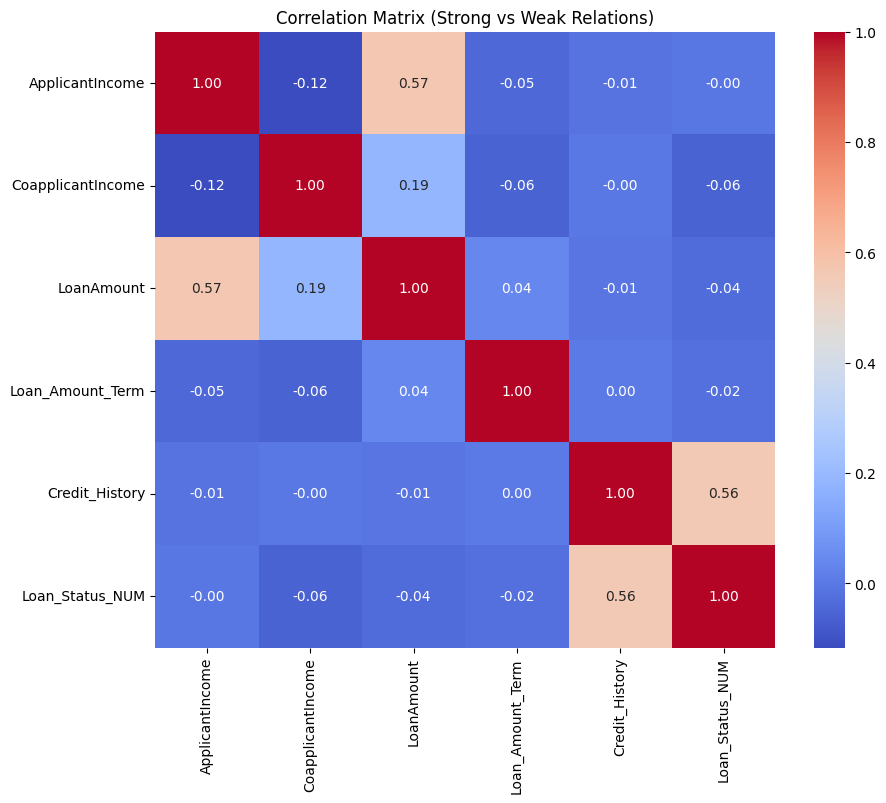

In [47]:
# plot the HeatMap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Strong vs Weak Relations)')
plt.show()

In [48]:
# Fill the missing data (Imputation)
# Mean imputation and median imputation consist of replacing missing data in numerical variables with the variable's mean or median. These simple univariate missing data imputation techniques are among the most commonly used when preparing data for data science projects.

#1. Define your list of columns based on the data types
# cat_cols == category columns
cat_cols = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Property_Area']
num_cols = ['LoanAmount' ,'Loan_Amount_Term']


In [49]:
#2. Fill Categorical Missing Values with Mode (Most Frequent)
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [50]:
#3. Fill Numerical Missing Values with MEDIAN
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [51]:
#4. Verify all NaN are gone
print("Missing Values now are : ")
print(df.isnull().sum())

Missing Values now are : 
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loan_Status_NUM      0
dtype: int64


In [52]:
# PHASE 3: Quant Features

#1. Create "Total Income" --> Applicant Income  + "Co-Applicant" Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [53]:
#2. Log Trans --> to fix the "skewed" data, as some rich people messed up the average
# this will create a Log Transformation that makes the data look like a "Bell Curved graph"
df['LoanAmount_Log'] = np.log(df['LoanAmount'])
df['Total_Income_Log'] = np.log(df['Total_Income'])



In [54]:
#3. Create the Ratio (Loan to Income)

df['Loan_to_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']

In [55]:
#4. Results
print("--- Features Correlation ---")
new_features = ['Total_Income', 'Loan_to_Income_Ratio', 'LoanAmount_Log', 'Loan_Status_NUM']
print(df[new_features].corr()['Loan_Status_NUM'])

--- Features Correlation ---
Total_Income           -0.031271
Loan_to_Income_Ratio   -0.086141
LoanAmount_Log         -0.037997
Loan_Status_NUM         1.000000
Name: Loan_Status_NUM, dtype: float64


In [56]:
# Save the cleaned data to CSV
df.to_csv('cleaned_train.csv', index=False)
print("Cleaned data saved to 'cleaned_train.csv'")

Cleaned data saved to 'cleaned_train.csv'


In [57]:
# PHASE 4 Model Development: p1) Data Preperation Code

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#1. Drop Unnecessary Columns -[Loan_ID, Applicant_Income 
# and CoApplicant_Income "replace with Total_Income", LoanAmount "Replaced 
# with LoanAmount_Log", Loan_Status_Num "this was only a helper for our 
# heatmap that was created eariler"]
cols_to_drop = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status_Num']
# Use 'errors=ignore' in case you already dropped them
df = df.drop(columns=cols_to_drop, errors='ignore')

In [58]:
# 2. Encode Target Variable (Loan_Status)
# The model needs 1s and 0s, not "Y" and "N".
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status']) # Y=1, N=0

In [59]:
# 3. Encode Categorical Features (One-Hot Encoding)
# Turns "Gender" into "Gender_Male" and "Gender_Female" columns.
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Save the cleaned data to CSV
df.to_csv('new_all_cleaned_train.csv', index=False)
print("new_all_Cleaned data saved to 'cleaned_train.csv'")

In [60]:
# 4. Split Data (Train vs Test)
# X = Features (The input)
# y = Target (The answer we want to predict)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [61]:
# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# 5. Feature Scaling (Crucial for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
print("--- Data Prepared ---")
print(f"Training Features Shape: {X_train_scaled.shape}")
print(f"Testing Features Shape: {X_test_scaled.shape}")

--- Data Prepared ---
Training Features Shape: (491, 16)
Testing Features Shape: (123, 16)


In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
# 1. Define the 3 Models
models = {
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "ANN (Neural Network)": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

In [66]:
# 2. Train and Evaluate Loop
print("--- Model Performance Results ---\n")

for name, model in models.items():
    # Train the model
    # Note: We use the SCALED data for training
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the report
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.2}") # Prints as decimal (e.g., 0.80)
    print("Confusion Matrix:")
    print(cm)
    print("-" * 30)

--- Model Performance Results ---

Model: Naïve Bayes
Accuracy: 1.0
Confusion Matrix:
[[43  0]
 [ 0 80]]
------------------------------
Model: Decision Tree
Accuracy: 1.0
Confusion Matrix:
[[43  0]
 [ 0 80]]
------------------------------
Model: ANN (Neural Network)
Accuracy: 1.0
Confusion Matrix:
[[43  0]
 [ 0 80]]
------------------------------


In [67]:
print(X.columns)

Index(['Loan_Amount_Term', 'Credit_History', 'Loan_Status_NUM', 'Total_Income',
       'LoanAmount_Log', 'Total_Income_Log', 'Loan_to_Income_Ratio',
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


In [68]:
#cheating column "Loan_Status_NUM"
cols_to_drop = ['Loan_Status_NUM', 'Loan_Status_Num']
df = df.drop(columns=cols_to_drop, errors='ignore')

In [69]:
# Re-Define X and y
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [70]:
# Re-Split and Re-Scale (CRITICAL: You must do this again to update X_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
print("--- Data Fixed ---")
print(f"Old Accuracy: 1.0 (Cheating)")
print(f"New Feature Count: {X_train.shape[1]} (Should be 1 less than before)")

--- Data Fixed ---
Old Accuracy: 1.0 (Cheating)
New Feature Count: 15 (Should be 1 less than before)


In [72]:
for name, model in models.items():

    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 30)

Model: Naïve Bayes
Accuracy: 0.78
Confusion Matrix:
[[19 24]
 [ 3 77]]
------------------------------
Model: Decision Tree
Accuracy: 0.80
Confusion Matrix:
[[23 20]
 [ 4 76]]
------------------------------
Model: ANN (Neural Network)
Accuracy: 0.68
Confusion Matrix:
[[20 23]
 [16 64]]
------------------------------


d:\Semester 5\intro to ai\Loan Eligibility Prediction\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
# 5. Add mods to the model to see some variation
models = {
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "ANN (Neural Network)": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=2000, random_state=42)
}

In [74]:
print("--- Re-Training Models ---")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

--- Re-Training Models ---
Naïve Bayes Accuracy: 0.7805
Decision Tree Accuracy: 0.8049
ANN (Neural Network) Accuracy: 0.6911
